In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

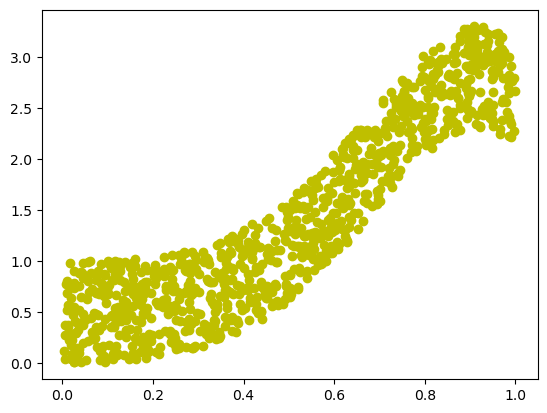

In [2]:
np.random.seed(42)
X = np.random.rand(1000,1)
y = 5*((X)**(3) * np.sin(np.exp(X))) + np.random.rand(1000,1)
plt.scatter(X,y, color='y')
plt.show()

In [3]:
poly_features = PolynomialFeatures(degree = 3, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly

array([[0.37454012, 0.1402803 , 0.0525406 ],
       [0.95071431, 0.90385769, 0.85931044],
       [0.73199394, 0.53581513, 0.39221343],
       ...,
       [0.13681863, 0.01871934, 0.00256115],
       [0.95023735, 0.90295103, 0.8580178 ],
       [0.44600577, 0.19892115, 0.08871998]])

In [4]:
polynomial_model = LinearRegression()
polynomial_model.fit(X_poly, y)
polynomial_model.intercept_, polynomial_model.coef_

(array([0.66599728]), array([[-3.07051631, 11.34224961, -5.96784319]]))

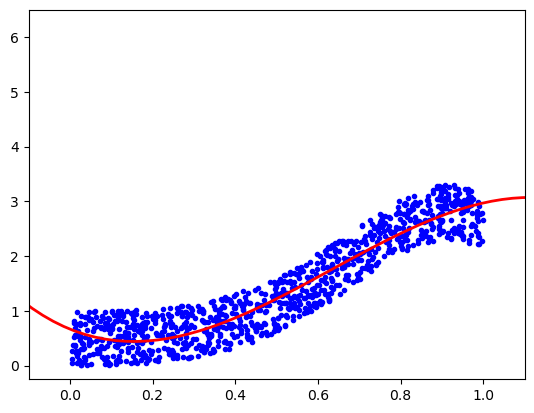

In [5]:
X_new=np.linspace(-1, 1.5, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = polynomial_model.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2)

plt.axis([-0.1, 1.1, -0.25, 6.5])
plt.show()

In [6]:
def transform_features(X, degree):
    new_features = []
    for i in range(len(X)):
        temp = []
        for j in range(degree + 1):
            temp.append(X[i][0]**j)
        new_features.append(temp)
    return np.array(new_features)

In [7]:
def MSE(X, w, y):
    y_pred = X @ w
    return np.sum((y - y_pred) ** 2) / len(X)

def MSE_grad_w(X, w, y):
    y_pred = X @ w
    return -2 / len(X) *  X.T @ (y - y_pred)

In [8]:
def gradient_descent(X, y, degree, learning_rate=0.0001, max_iterations=1000, eps=1e-6):
    X_poly = transform_features(X, degree)
    w = np.random.randn(X_poly.shape[1], 1)
    for iteration in range(max_iterations):
        gradient = MSE_grad_w(X_poly, w, y)
        new_w = w - learning_rate * gradient
        if np.linalg.norm(new_w - w, ord=1) < eps:
            break
        w = new_w
    return w

In [9]:
def polynomial_predict(w, X, degree):
    X_poly = transform_features(X, degree)
    return X_poly @ w


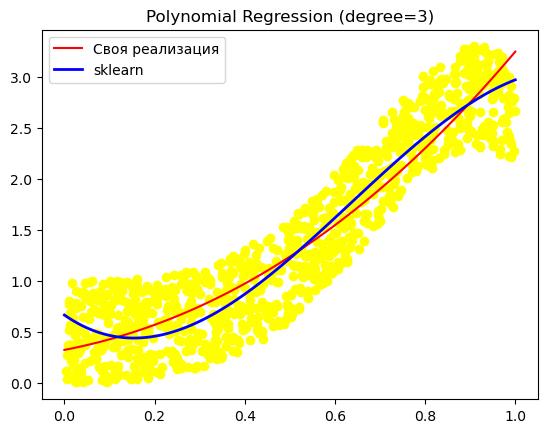

In [10]:
degree = 3

w = gradient_descent(X, y, degree, learning_rate=0.1, max_iterations=5000)

X_new = np.linspace(0, 1, 100).reshape(100, 1)
y_new = polynomial_predict(w, X_new, degree)

plt.scatter(X, y, color='yellow')
plt.plot(X_new, y_new, color='red', label="Своя реализация")
plt.title(f'Polynomial Regression (degree={degree})')

X_new_poly = poly_features.transform(X_new)
y_new_sklearn = polynomial_model.predict(X_new_poly)
plt.plot(X_new, y_new_sklearn, "b-", linewidth=2, label="sklearn")
plt.legend()
plt.show()
